# Calculus tools and demonstrations
By <a href="https://www.maxkapur.com/">Max Kapur</a>. Updated Apr. 7, 2020.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Drawing B&eacute;zier curves

Reference: <a href="https://www.youtube.com/watch?v=3izFMB91K_Q">This YouTube video.</a>

Fix a list of $n$ points in $\mathbb{R}^m$. We would like to create a curve that proceeds smoothly from point $x_1$ to $x_n$ so that when the curve is closest to $x_i$, its normal vector points toward the point $x_i$. At the endpoints $x_1$ and $x_n$, the curve should be tangent to the straight lines connecting $x_1$ and $x_2$, and $x_{n-1}$ and $x_n$, respectively. This is a **B&eacute;zier curve**, useful in design and illustration.

The solution is an iterative parameterization process. First, create vector functions of $t$ that make a linear interpolation between each point in the sequence (except the final point $x_n$) and the point immediately following it, yielding a vector of (vector) functions $y = \left<y_1(t), y_2(t), \dots ,y_{n-1}(t)\right>$. Apply this same procedure to the $n-1$ vectors in $y$, yielding $z = \left<z_1(t), z_2(t), \dots ,z_{n-2}(t)\right>$, and keep iterating until the resulting list contains only one vector function, $r(t)$. This is the B&eacute;zier curve, a polynomial of degree $n-1$. 

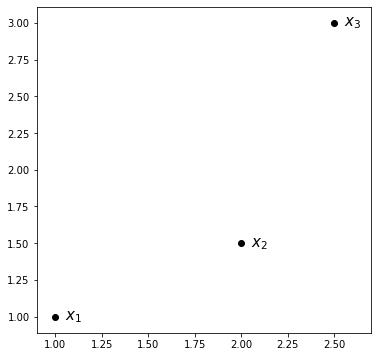

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
x = np.array([[1,1],[2, 1.5], [2.5, 3]])
plt.scatter(*x.T, color='black')
plt.xlim(.9, 2.7)
for i, xy in enumerate(x):
    plt.annotate(r'$x_{}$'.format(i+1), xy+[0.1,0], ha='center', va='center',size=15)

For the points shown above, we have $n=3$ and $m=2$, with

$$\begin{align}x_1 &= \begin{bmatrix}1 \\ 1\end{bmatrix} \\
x_2 &= \begin{bmatrix}2 \\ 1.5\end{bmatrix} \\
x_3 &= \begin{bmatrix}2.5 \\ 3\end{bmatrix} \end{align}$$

The first iteration is as follows:

$$\begin{align}
\text{from } x_1 \to x_2:\quad & y_1 (t) & = (1-t) x_1 + (t) x_2 \\
\text{from } x_2 \to x_3:\quad & y_2 (t) & = (1-t) x_2 + (t) x_3 \\
\end{align}$$

In the second and final iteration, $r(t)$ connects $y_1$ and $y_2$: 

$$\begin{align}r(t) & = (1-t) y_1 + (t) y_2 \\
& = (1-t) \left[(1-t) x_1 + (t) x_2\right] + (t) \left[(1-t) x_2 + (t) x_3\right] \\
& = \begin{bmatrix}- 0.5 \\1.0 \end{bmatrix} t^2 + 
\begin{bmatrix} 2 \\ 1\end{bmatrix} t + 
\begin{bmatrix} 1\\1 \end{bmatrix} \\
& = \begin{bmatrix}- 0.5 t^{2} + 2 t + 1\\1.0 t^{2} + 1 t + 1\end{bmatrix}
\end{align}$$

This is quadratic in $t$, as expected.

Here I&rsquo;ve written a Python function that draws B&eacute;zier curves of a specified resolution for an arbitrary list of points.

In [3]:
def bezier(pivots, res=10):
    assert len(pivots.shape)==2
    
    # t-values at which curve will be evaluated
    t = np.linspace(0,1,res)
    
    # primitive curves (segments between points)
    p=[]
    for i in range(pivots.shape[0] - 1):
        p.append(np.outer((1-t), pivots[i]) + np.outer((t), pivots[i+1]))
    p= np.stack(p)

    # recursively parameterize between the curves until we've done them all
    while p.shape[0] >= 2:
        g=[]
        for i in range(p.shape[0] - 1): 
            g.append( (p[i].T * (1-t) ).T + (p[i+1].T * (t) ).T )
        p=np.stack(g)
    return p.reshape(p.shape[1:])

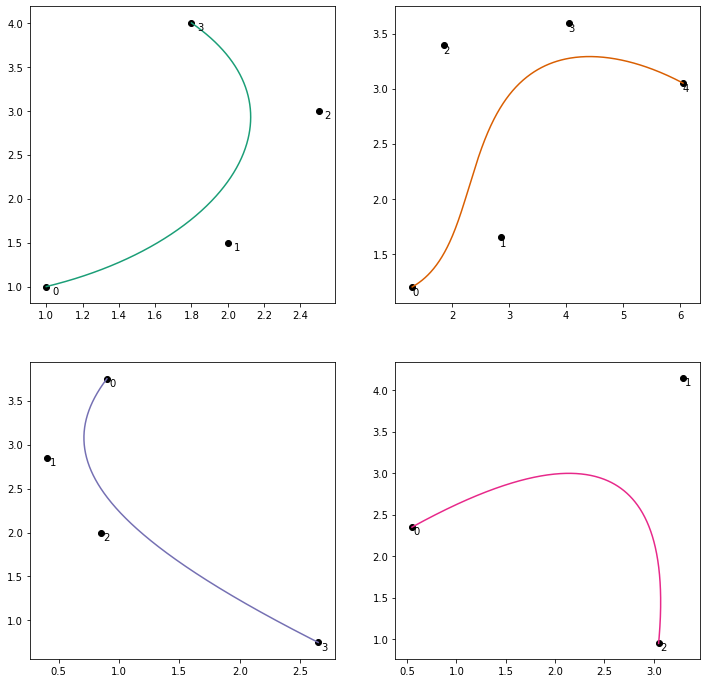

In [4]:
four = [np.array([[1,1],[2, 1.5], [2.5, 3],[1.8, 4]]),
        np.array([1.3, 1.2,2.85, 1.65,1.85, 3.4,4.05, 3.6,6.05, 3.05]).reshape(5,2),
        np.array([[0.9, 3.75],
            [0.4, 2.85],
            [0.85, 2],
            [2.65, 0.75]]),
        np.array([[0.55, 2.35],
            [3.3, 4.15],
            [3.05, 0.95]])]

colors = plt.cm.Dark2(np.linspace(0,.49,4))
fig, ax = plt.subplots(2,2,figsize=(12,12))

for i, pivots in enumerate(four):
    ax[int(i/2), i%2].plot(*bezier(pivots, res=500).T, color = colors[i])
    ax[int(i/2), i%2].scatter(*pivots.T, color="black")
    for j, xy in enumerate(pivots):
        ax[int(i/2), i%2].annotate(j, xy + [.05,-.05], ha='center', va='center')

It works in 3D, too.

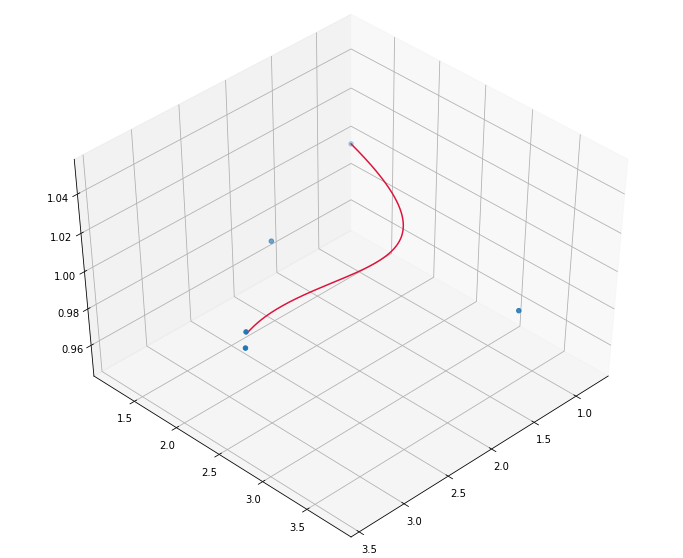

In [5]:
pivots = np.array([[0.8, 1.2, 1],
[1.55, 3.8, 1],
[2.25, 1.75, 1],
[3.4, 2.65, 1],
[3.25, 2.5, 1]])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)

ax.scatter(*pivots.T)
ax.plot(*bezier(pivots, res=500).T, color = 'crimson')

In [9]:
!jupyter nbconvert calc.ipynb

[NbConvertApp] Converting notebook calc.ipynb to html
[NbConvertApp] Writing 454040 bytes to calc.html
